<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

#**Analisis Urgensi Penanganan Pasien Covid-19**
#### By Kelompok Regression
</center>

# **Hal-hal Terkait Kelompok dan Dataset**

## **Anggota**

1. David Alexander - 2006596062
2. Muhammad Imam Luthfi Balaka - 2006524290
3. Ramdhan Firdaus Amelia - 2006595753
4. Taufik Pragusga - 2006595980

## **Referensi**

In [ ]:
Referensi = [
             "https://www.kaggle.com/code/arindambaruah/should-i-be-worried-if-i-test-covid-ve",
             "https://www.kaggle.com/code/jeffreybraun/identifying-susceptible-pop-of-covid-19-fatality",
             "https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe",
             "https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/#:~:text=KModes%20clustering%20is%20one%20of,similar%20our%20data%20points%20are."
]

## **Dataset yang digunakan:**
[Dataset COVID-19 patient pre-condition dari pemerintah Mexico](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv)

## **Deskripsi Dataset**

`id`: ID of patient

`sex`: Female - 1, Male - 2

`patient_type`: Outpatient - 1, Inpatient - 2

`entry_date`: Date of Entry to hospital

`date_symptoms`: Date of first symptom

`date_died`: Date of death (9999-99-99 means patient didn't die)

`intubed`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`pneumonia`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`age`: Age

`pregnancy`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`diabetes`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`copd`: Yes - 1, No - 2, Data Missing or NA - 97, 98, 99

`asthma`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`inmsupr`: Yes - 1, No - 2, Data Missing or NA - 97, 98, 99

`hypertension`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`other_disease`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`cardiovascular`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`obesity`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`renal_chronic`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`tobacco`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`contact_other_covid`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

`covid_res`: Positive - 1, Negative - 2, Awaiting Results - 3

`icu`: Yes - 1, No - 2, Data missing or NA - 97, 98, 99

# **Tasks**

## **Import Library dan Data**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# df = pd.read_csv('covid.csv')
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir KASDD/covid.csv')

In [ ]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [ ]:
print("Dataframe shape (row, col): ", df.shape)

Dataframe shape (row, col):  (566602, 23)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

## **1. Data Preprocessing dan EDA**

### **Data Preprocessing**

Penanganan null value pada baris dengan sex = 2 (male), yaitu diisi dengan 2 (tidak hamil).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'after')]

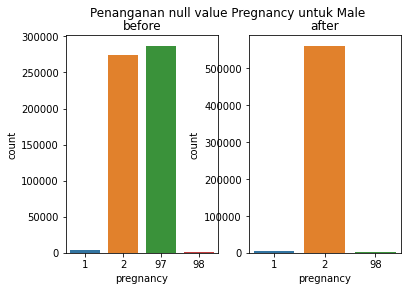

In [ ]:
fig, ax = plt.subplots(1,2)
fig.suptitle('Penanganan null value Pregnancy untuk Male')
sns.countplot(df['pregnancy'], ax=ax[0]).set(title = 'before')
fig.show()

df["pregnancy"].loc[(df["pregnancy"] >= 97) & (df["sex"] == 2)] = 2

sns.countplot(df['pregnancy'], ax=ax[1]).set(title = 'after')

Pengembalian data null yang sudah di-encode (97, 98, 99) ke null agar lebih mudah diproses.

In [ ]:
# Menukar posisi kolom dan menghapus kolom id yang tidak memberikan insight
df = df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]

In [ ]:
# Mengembalikan encoded null value ke null kembali
df.iloc[:,6:] = df.iloc[:,6:].replace([97, 98, 99], np.nan)

In [ ]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,27,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN
1,2,1,19-03-2020,17-03-2020,9999-99-99,24,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN
2,1,2,06-04-2020,01-04-2020,9999-99-99,54,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0
3,2,2,17-04-2020,10-04-2020,9999-99-99,30,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0
4,1,2,13-04-2020,13-04-2020,22-04-2020,60,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,2.0


Visualisasi null values tiap kolom

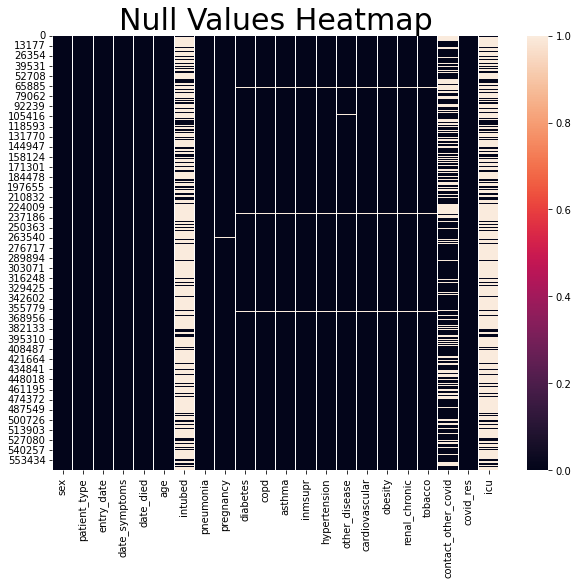

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull())
plt.title('Null Values Heatmap', size=30)
plt.show()

Penanganan missing/null values pada kolom-kolom lain, yaitu dengan di-drop karena data yang tersisa sudah lebih dari cukup.

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,02-06-2020,02-06-2020,9999-99-99,25,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
1,1,2,22-06-2020,17-06-2020,9999-99-99,52,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
2,2,2,12-04-2020,07-04-2020,13-04-2020,57,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
3,1,2,17-06-2020,12-06-2020,9999-99-99,51,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
4,1,2,08-06-2020,07-06-2020,9999-99-99,67,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0


In [ ]:
print("Dataframe current shape (row, col): ", df.shape)

Dataframe current shape (row, col):  (58651, 22)


Mencari tahu apakah ada data duplikat dan men-drop-nya.

In [ ]:
print("Jumlah data duplikat: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Dataframe current shape (row, col): ", df.shape)

Jumlah data duplikat:  520
Dataframe current shape (row, col):  (58131, 22)


Melihat apakah ada outliers dan menanganinya

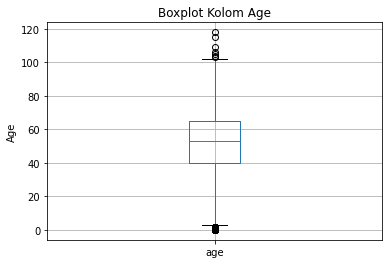

In [ ]:
# Melihat outliers pada kolom age
df.boxplot(column='age')
plt.title("Boxplot Kolom Age")
plt.ylabel("Age")
plt.show()

Penanganan outliers pada kolom age

In [ ]:
Q1 = np.quantile(df["age"], .25)
Q3 = np.quantile(df["age"], .75)
IQR = Q3 - Q1

RLB = Q1 - 1.5 * IQR
RUB = Q3 + 1.5 * IQR

low_out = []
high_out = []

for i in df["age"]:
  if (i < RLB):
      low_out.append(i)
  if (i > RUB):
      high_out.append(i)

print('Low outlier : ', len(low_out))
print('High outlier : ', len(high_out))

Low outlier :  1702
High outlier :  7


In [ ]:
df = df.loc[df["age"] <= RUB]
df = df.loc[df["age"] >= RLB]
print("Dataframe current shape (row, col): ", df.shape)

Dataframe current shape (row, col):  (56422, 22)


Data formatting untuk kolom-kolom tanggal

In [ ]:
df.entry_date = pd.to_datetime(df.entry_date, dayfirst=True, errors='coerce')
df.date_symptoms = pd.to_datetime(df.date_symptoms, dayfirst=True, errors='coerce')
df.date_died = pd.to_datetime(df.date_died, dayfirst=True, errors='coerce')

In [ ]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,2020-06-02,2020-06-02,NaT,25,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
1,1,2,2020-06-22,2020-06-17,NaT,52,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
2,2,2,2020-04-12,2020-04-07,2020-04-13,57,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
3,1,2,2020-06-17,2020-06-12,NaT,51,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
4,1,2,2020-06-08,2020-06-07,NaT,67,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0


### **EDA**

#### **Task 1: Bagaimana distribusi hari seorang pasien muncul gejala sampai meninggal?**

Feature engineering: Membuat kolom `confirmed_died` yang menunjukkan apakah pasien meninggal dan `died_symptoms_delta` yang menunjukkan waktu dari bergejala hingga meninggal.

In [ ]:
df['confirmed_died'] = np.where(df['date_died'].isnull(), False, True)
df['died_symptoms_delta'] = df.date_died - df.date_symptoms

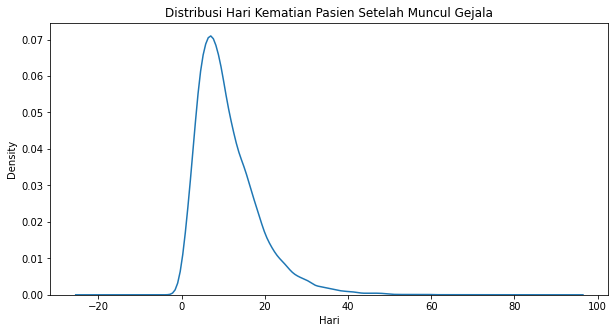

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.died_symptoms_delta.dropna().dt.days)
plt.title("Distribusi Hari Kematian Pasien Setelah Muncul Gejala")
plt.xlabel("Hari")
plt.show()

> Distribusinya cenderung positively skewed.

#### **Task 2: Bagaimana distribusi hari seorang pasien masuk ICU sampai meninggal?**

Feature engineering: Membuat kolom `died_icu_delta` yang menunjukkan waktu dari masuk ICU hingga meninggal.

In [ ]:
df['died_icu_delta'] = df.date_died - df.entry_date

Menampilkan distribusinya.

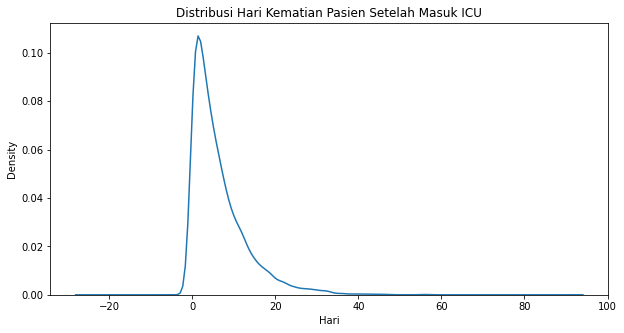

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df.died_icu_delta.dropna().dt.days)
plt.title("Distribusi Hari Kematian Pasien Setelah Masuk ICU")
plt.xlabel("Hari")
plt.show()

> Distribusinya tidak jauh berbeda dengan task sebelumnya (hari kematian setelah muncul gejala).

#### **Task 3: Bagaimana hubungan antara sex seseorang dengan meninggalnya mereka?**

Membandingkan fatality rate (yang meninggal di antara semua) antara male dan female dari yang terdeksi positif

In [ ]:
# Filter hanya yang positif
df_positive = df[df.covid_res == 1] 

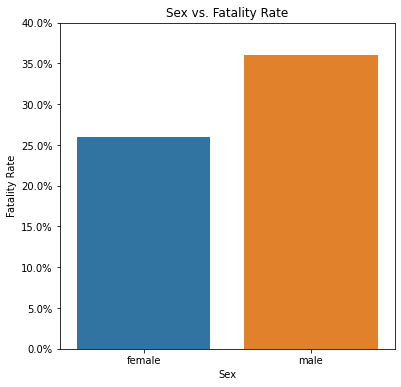

In [ ]:
female_fatality = df_positive[df_positive.sex == 1]['confirmed_died'].value_counts()
female_fatality_rate = female_fatality[1] / (female_fatality[0] + female_fatality[1])
male_fatality = df_positive[df_positive.sex == 2]['confirmed_died'].value_counts()
male_fatality_rate = male_fatality[1] / (male_fatality[0] + female_fatality[1])

plt.figure(figsize=(6, 6))
ax = sns.barplot(x = ['female', 'male'], y = [female_fatality_rate, male_fatality_rate])
plt.ylim((0, 0.4))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.title('Sex vs. Fatality Rate')
plt.xlabel('Sex')
plt.ylabel('Fatality Rate')
plt.show()

> Berdasarkan dataset, fatality rate male lebih tinggi dari female.

#### **Task 4: Bagaimana hubungan antara age seseorang dengan meninggalnya mereka?**

Membandingkan fatality rate antara age dan meninggalnya pasien

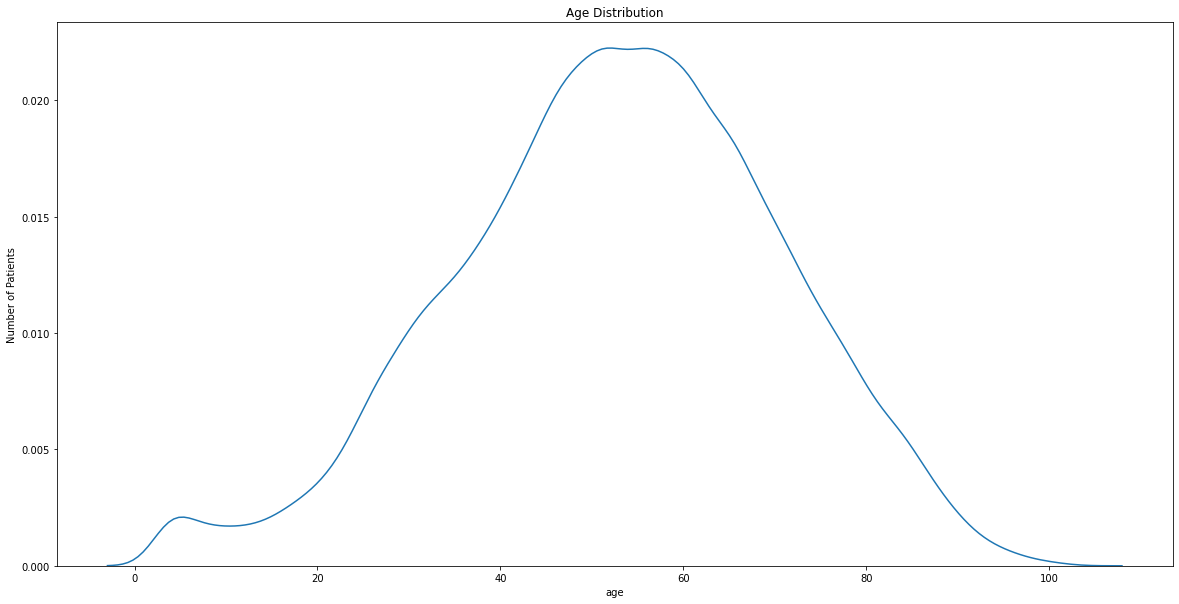

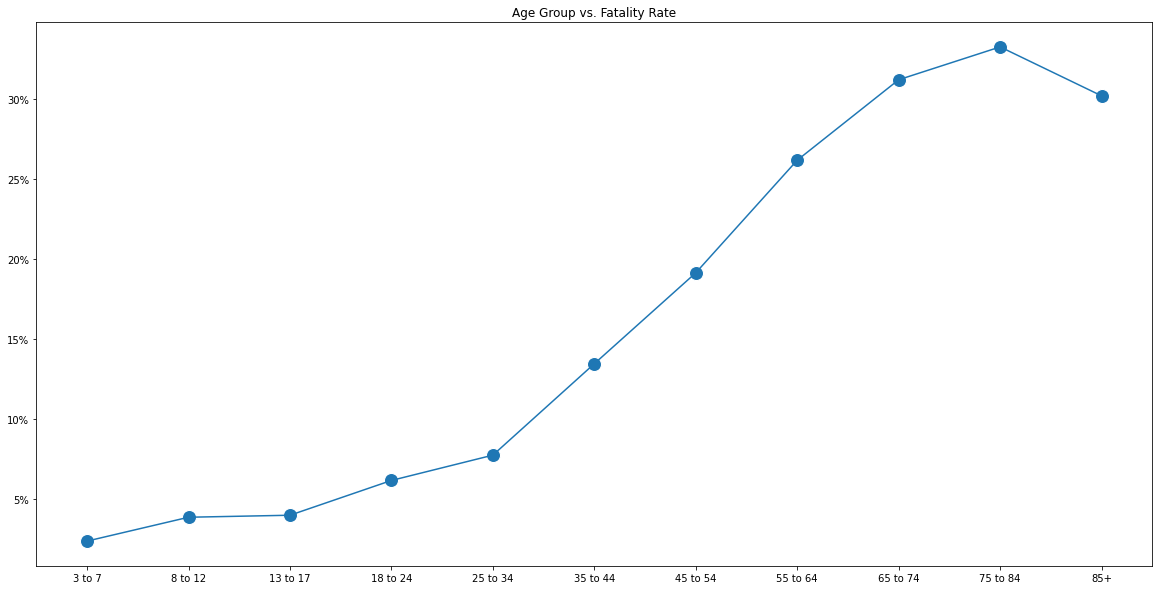

In [ ]:
def assign_age_bin(row):
    age = row
    if age <= 7:
        return "3 to 7"
    elif age <= 12:
        return "8 to 12"
    elif age <= 17:
        return "13 to 17"
    elif age <= 24:
        return "18 to 24"
    elif age <= 34:
        return "25 to 34"
    elif age <= 44:
        return "35 to 44"
    elif age <= 54:
        return "45 to 54"
    elif age <= 64:
        return "55 to 64"
    elif age <= 74:
        return "65 to 74"
    elif age <= 84:
        return "75 to 84"
    else:
        return "85+"

df['age_bin'] = df.age.apply(lambda row: assign_age_bin(row))

plt.figure(figsize=(20, 10))
sns.kdeplot(df.age)
plt.title('Age Distribution')
plt.ylabel('Number of Patients')
plt.show()

col_order = ['3 to 7', '8 to 12', '13 to 17', '18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 to 74', '75 to 84', '85+']

prob = []
for age_bin_lab in col_order:
    vc = df[df.age_bin == age_bin_lab]['confirmed_died'].value_counts()
    if not vc.empty:
        prob.append(vc[True]/(vc[False] + vc[True]))

plt.figure(figsize=(20,10))
sns.lineplot(x = col_order, y = prob, sort=False)
ax = sns.scatterplot(x = col_order, y = prob, s = 200)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.title('Age Group vs. Fatality Rate')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### **Task 5: Bagaimana hubungan banyaknya penyakit komorbid yang dimiliki seseorang dengan meninggalnya mereka?**

Feature engineering `num_comorbid` yang berisi jumlah komorbid masing-masing pasien

In [ ]:
df_with_comorbid = df.copy()
df_with_comorbid['num_comorbid'] = 0
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['pneumonia'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['diabetes'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['copd'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['asthma'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['inmsupr'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['hypertension'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['cardiovascular'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['obesity'] == 1] += 1
df_with_comorbid['num_comorbid'].loc[df_with_comorbid['renal_chronic'] == 1] += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Menampilkan fatality rate pasien dengan berbagai jumlah komorbid

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 0, 'Fatality rate: 23.53 %')

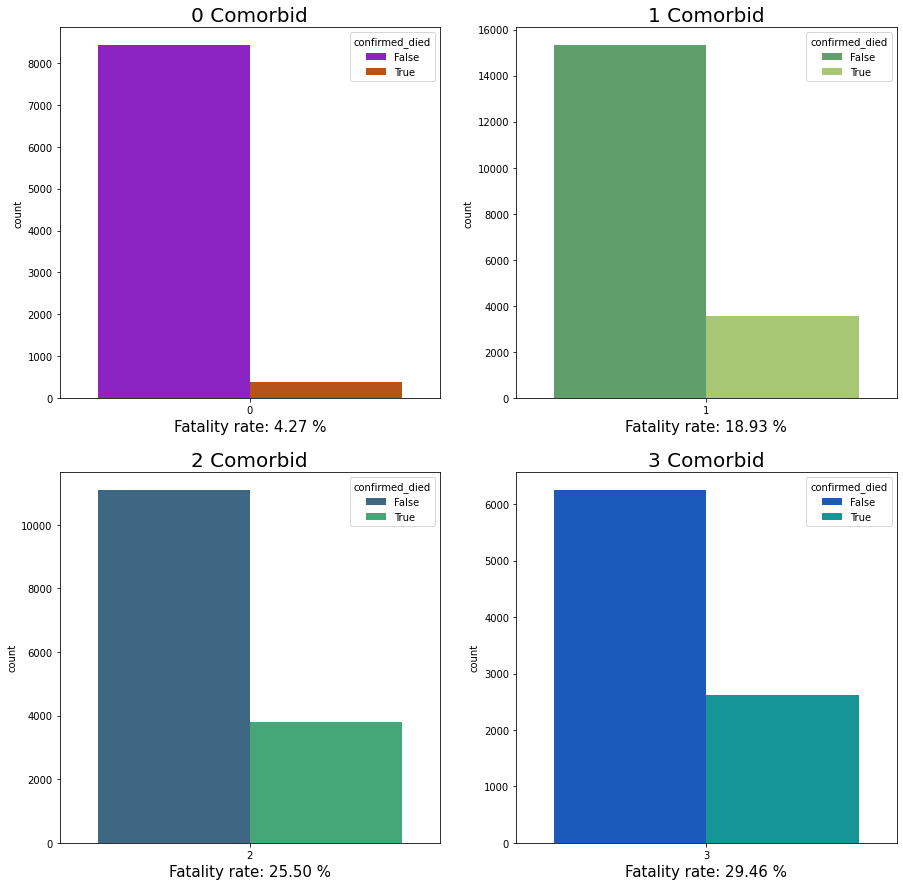

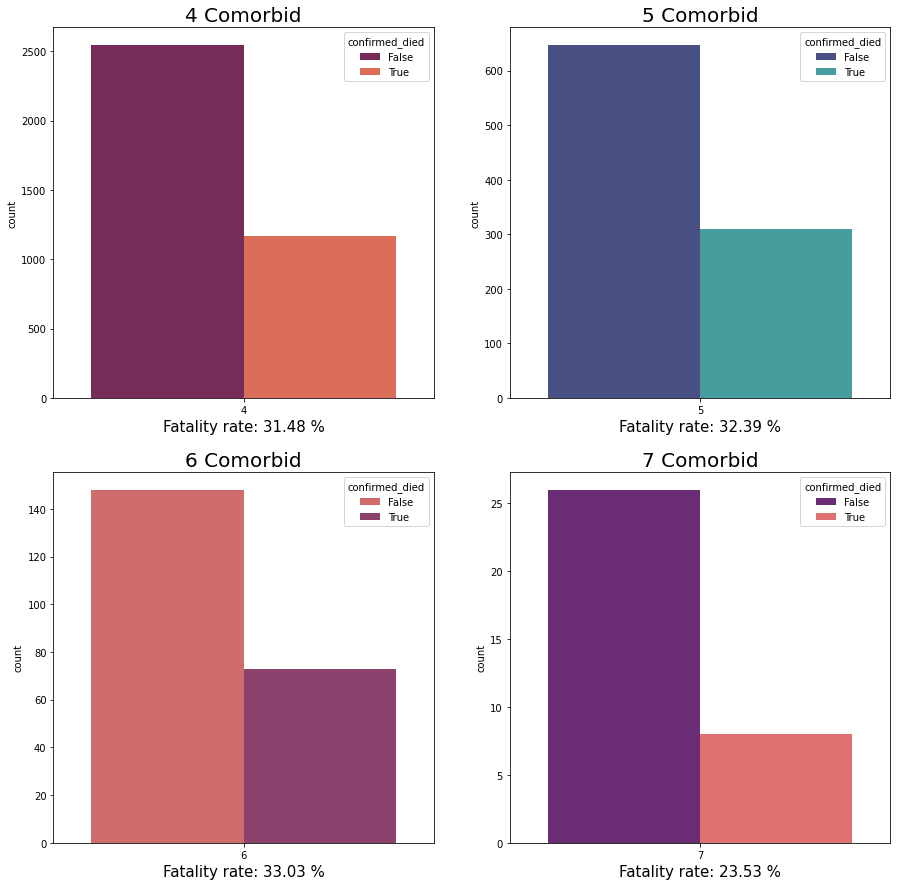

In [ ]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)

fig3=plt.figure(figsize=(15,15))
ax5=fig3.add_subplot(2,2,1)
ax6=fig3.add_subplot(2,2,2)
ax7=fig3.add_subplot(2,2,3)
ax8=fig3.add_subplot(2,2,4)

df_comorbid_0 = df_with_comorbid[df_with_comorbid.num_comorbid == 0]
df_comorbid_1 = df_with_comorbid[df_with_comorbid.num_comorbid == 1]
df_comorbid_2 = df_with_comorbid[df_with_comorbid.num_comorbid == 2]
df_comorbid_3 = df_with_comorbid[df_with_comorbid.num_comorbid == 3]
df_comorbid_4 = df_with_comorbid[df_with_comorbid.num_comorbid == 4]
df_comorbid_5 = df_with_comorbid[df_with_comorbid.num_comorbid == 5]
df_comorbid_6 = df_with_comorbid[df_with_comorbid.num_comorbid == 6]
df_comorbid_7 = df_with_comorbid[df_with_comorbid.num_comorbid == 7]

sns.countplot('num_comorbid',data=df_comorbid_0,hue='confirmed_died',ax=ax1,palette='gnuplot')
sns.countplot('num_comorbid',data=df_comorbid_1,hue='confirmed_died',ax=ax2,palette='summer')
sns.countplot('num_comorbid',data=df_comorbid_2,hue='confirmed_died',ax=ax3,palette='viridis')
sns.countplot('num_comorbid',data=df_comorbid_3,hue='confirmed_died',ax=ax4,palette='winter')
sns.countplot('num_comorbid',data=df_comorbid_4,hue='confirmed_died',ax=ax5,palette='rocket')
sns.countplot('num_comorbid',data=df_comorbid_5,hue='confirmed_died',ax=ax6,palette='mako')
sns.countplot('num_comorbid',data=df_comorbid_6,hue='confirmed_died',ax=ax7,palette='flare')
sns.countplot('num_comorbid',data=df_comorbid_7,hue='confirmed_died',ax=ax8,palette='magma')

ax1.set_title('0 Comorbid',size=20)
ax2.set_title('1 Comorbid',size=20)
ax3.set_title('2 Comorbid',size=20)
ax4.set_title('3 Comorbid',size=20)
ax5.set_title('4 Comorbid',size=20)
ax6.set_title('5 Comorbid',size=20)
ax7.set_title('6 Comorbid',size=20)
ax8.set_title('7 Comorbid',size=20)

ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_0['confirmed_died'].value_counts()[1]/df_comorbid_0['confirmed_died'].shape[0]),size=15)
ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_1['confirmed_died'].value_counts()[1]/df_comorbid_1['confirmed_died'].shape[0]),size=15)
ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_2['confirmed_died'].value_counts()[1]/df_comorbid_2['confirmed_died'].shape[0]),size=15)
ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_3['confirmed_died'].value_counts()[1]/df_comorbid_3['confirmed_died'].shape[0]),size=15)
ax5.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_4['confirmed_died'].value_counts()[1]/df_comorbid_4['confirmed_died'].shape[0]),size=15)
ax6.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_5['confirmed_died'].value_counts()[1]/df_comorbid_5['confirmed_died'].shape[0]),size=15)
ax7.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_6['confirmed_died'].value_counts()[1]/df_comorbid_6['confirmed_died'].shape[0]),size=15)
ax8.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_comorbid_7['confirmed_died'].value_counts()[1]/df_comorbid_7['confirmed_died'].shape[0]),size=15)

> Visualisasi di atas menunjukkan adanya trend fatality rate yang cenderung meningkat dengan semakin banyaknya jumlah komorbid.

#### **Task 6: Penyakit komorbid apa yang paling berkorelasi dengan meninggalnya pasien?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 0, 'Fatality rate: 31.12 %')

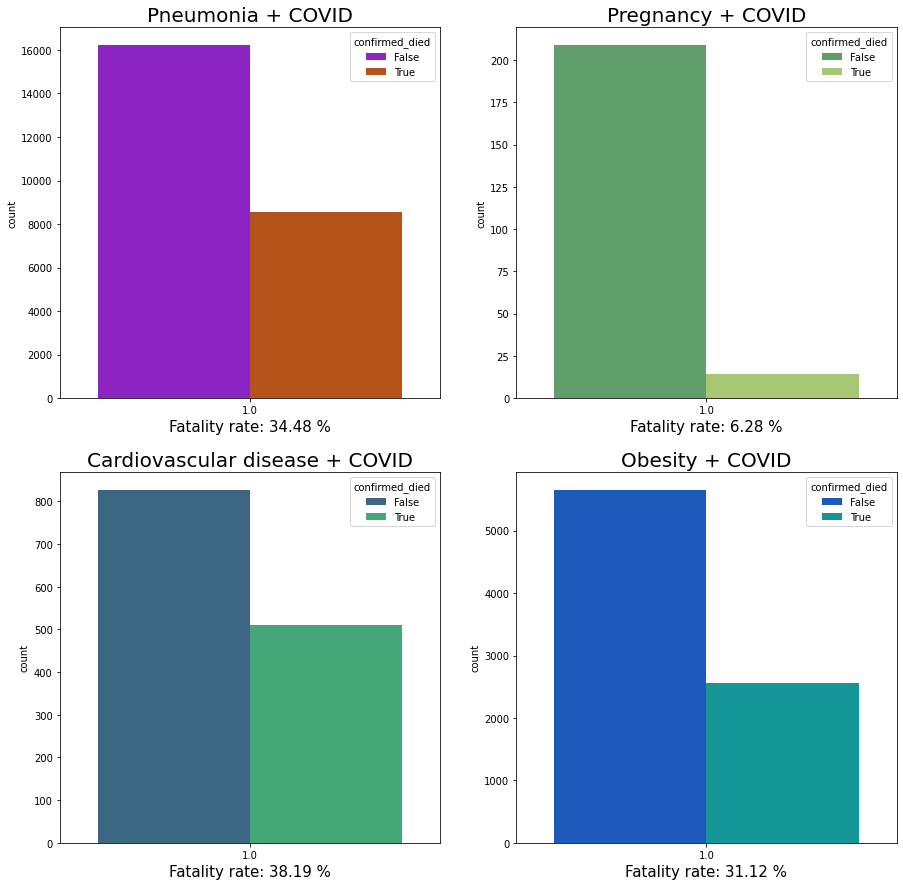

In [ ]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)

df_pneu=df_positive[df_positive['pneumonia']==1]
df_preg=df_positive[df_positive['pregnancy']==1]
df_card=df_positive[df_positive['cardiovascular']==1]
df_obes=df_positive[df_positive['obesity']==1]

sns.countplot('pneumonia',data=df_pneu,hue='confirmed_died',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='confirmed_died',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='confirmed_died',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='confirmed_died',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)

ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['confirmed_died'].value_counts()[1]/df_pneu['confirmed_died'].shape[0]),size=15)
ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['confirmed_died'].value_counts()[1]/df_preg['confirmed_died'].shape[0]),size=15)
ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['confirmed_died'].value_counts()[1]/df_card['confirmed_died'].shape[0]),size=15)
ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['confirmed_died'].value_counts()[1]/df_obes['confirmed_died'].shape[0]),size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

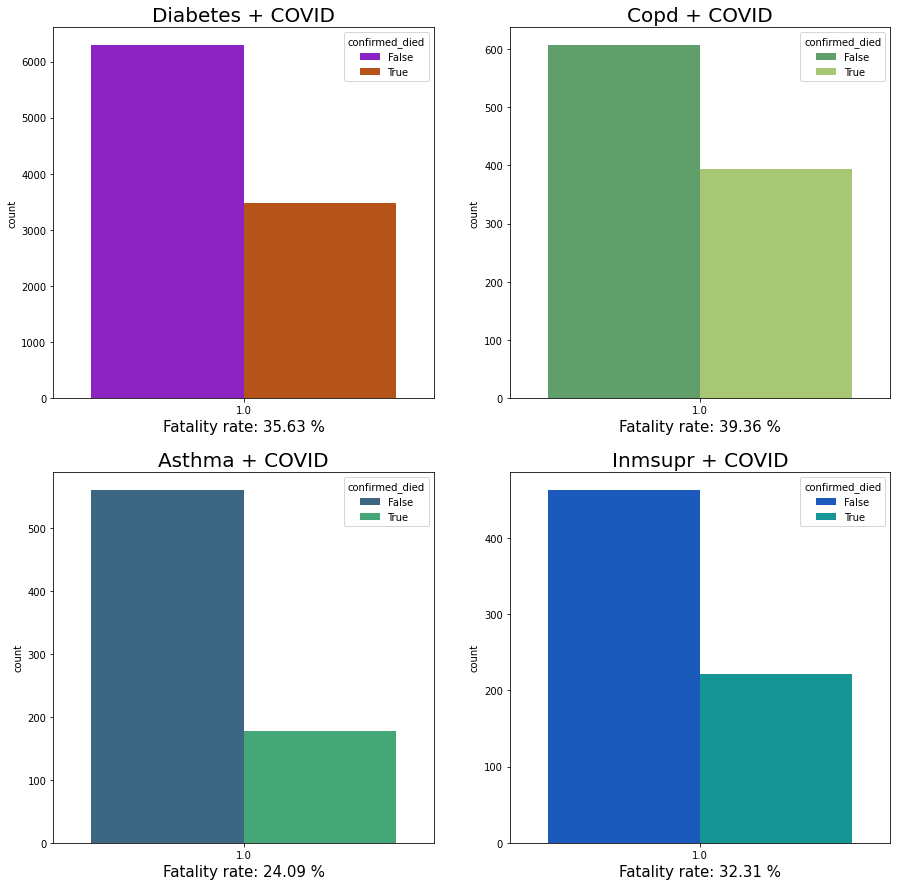

In [ ]:
fig3=plt.figure(figsize=(15,15))
ax5=fig3.add_subplot(2,2,1)
ax6=fig3.add_subplot(2,2,2)
ax7=fig3.add_subplot(2,2,3)
ax8=fig3.add_subplot(2,2,4)

df_diab=df_positive[df_positive['diabetes']==1]
df_copd=df_positive[df_positive['copd']==1]
df_asma=df_positive[df_positive['asthma']==1]
df_inmsupr=df_positive[df_positive['inmsupr']==1]

sns.countplot('diabetes',data=df_diab,hue='confirmed_died',ax=ax5,palette='gnuplot')
sns.countplot('copd',data=df_copd,hue='confirmed_died',ax=ax6,palette='summer')
sns.countplot('asthma',data=df_asma,hue='confirmed_died',ax=ax7,palette='viridis')
sns.countplot('inmsupr',data=df_inmsupr,hue='confirmed_died',ax=ax8,palette='winter')

ax5.set_title('Diabetes + COVID',size=20)
ax6.set_title('Copd + COVID',size=20)
ax7.set_title('Asthma + COVID',size=20)
ax8.set_title('Inmsupr + COVID',size=20)

ax5.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_diab['confirmed_died'].value_counts()[1]/df_diab['confirmed_died'].shape[0]),size=15)
ax6.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_copd['confirmed_died'].value_counts()[1]/df_copd['confirmed_died'].shape[0]),size=15)
ax7.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_asma['confirmed_died'].value_counts()[1]/df_asma['confirmed_died'].shape[0]),size=15)
ax8.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_inmsupr['confirmed_died'].value_counts()[1]/df_inmsupr['confirmed_died'].shape[0]),size=15)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Fatality rate: 30.09 %')

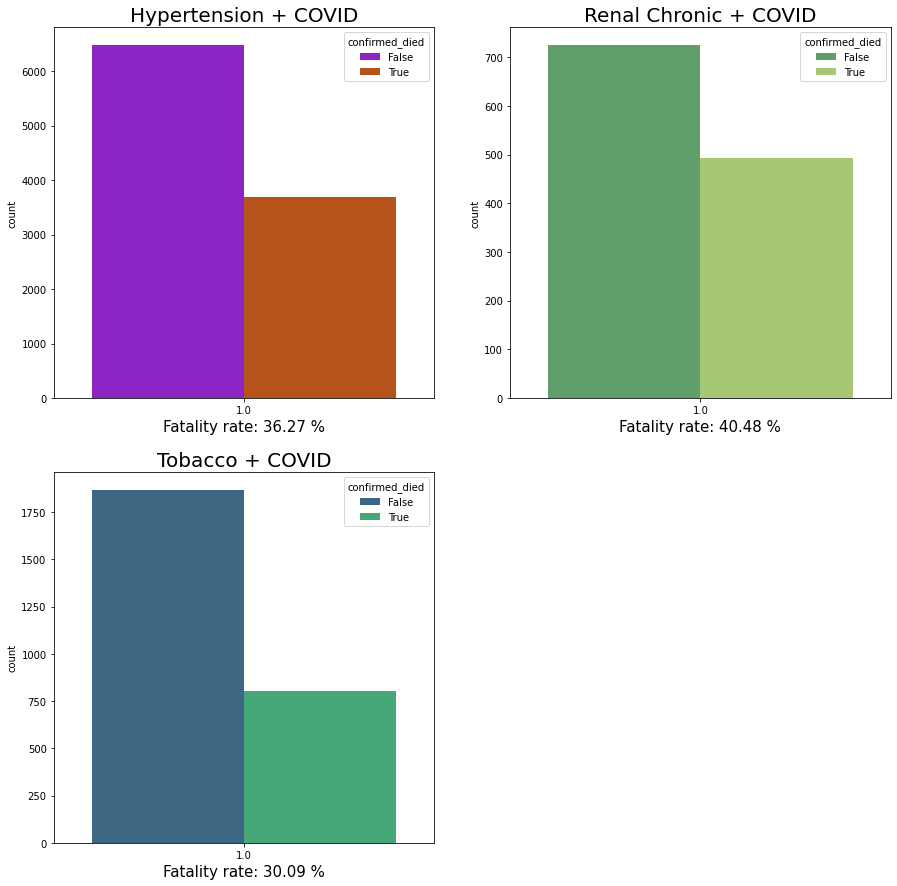

In [ ]:
fig4=plt.figure(figsize=(15,15))
ax9=fig4.add_subplot(2,2,1)
ax10=fig4.add_subplot(2,2,2)
ax11=fig4.add_subplot(2,2,3)

df_hyper=df_positive[df_positive['hypertension']==1]
df_renal=df_positive[df_positive['renal_chronic']==1]
df_tobacco=df_positive[df_positive['tobacco']==1]

sns.countplot('hypertension',data=df_hyper,hue='confirmed_died',ax=ax9,palette='gnuplot')
sns.countplot('renal_chronic',data=df_renal,hue='confirmed_died',ax=ax10,palette='summer')
sns.countplot('tobacco',data=df_tobacco,hue='confirmed_died',ax=ax11,palette='viridis')

ax9.set_title('Hypertension + COVID',size=20)
ax10.set_title('Renal Chronic + COVID',size=20)
ax11.set_title('Tobacco + COVID',size=20)

ax9.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_hyper['confirmed_died'].value_counts()[1]/df_hyper['confirmed_died'].shape[0]),size=15)
ax10.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_renal['confirmed_died'].value_counts()[1]/df_renal['confirmed_died'].shape[0]),size=15)
ax11.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_tobacco['confirmed_died'].value_counts()[1]/df_tobacco['confirmed_died'].shape[0]),size=15)

> Bisa dilihat bahwa fatality rate untuk renal chronic adalah yang paling tinggi.

## **2. Clustering**

In [ ]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,confirmed_died,died_symptoms_delta,died_icu_delta,age_bin
0,1,2,2020-06-02,2020-06-02,NaT,25,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,25 to 34
1,1,2,2020-06-22,2020-06-17,NaT,52,2.0,2.0,2.0,2.0,...,1.0,2.0,1.0,1.0,1.0,2.0,False,NaT,NaT,45 to 54
2,2,2,2020-04-12,2020-04-07,2020-04-13,57,1.0,1.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,True,6 days,1 days,55 to 64
3,1,2,2020-06-17,2020-06-12,NaT,51,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,45 to 54
4,1,2,2020-06-08,2020-06-07,NaT,67,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,65 to 74


In [ ]:
df_positive = df[df['covid_res'] == 1]

In [ ]:
df_posdied = df_positive[df_positive['confirmed_died'] == True]

In [ ]:
data = df_posdied[['age', 'died_symptoms_delta']]

In [ ]:
data.head()

,age,died_symptoms_delta
2,57,6 days
12,78,10 days
22,65,7 days
28,58,1 days
30,43,7 days


In [ ]:
delta = []
for index, row in data.iterrows():
    d = str(row['died_symptoms_delta']).split(" ")[0]
    delta.append(int(d))
    
data['delta'] = delta
data.drop(columns=['died_symptoms_delta'], axis = 1, inplace=True)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,delta
2,57,6
12,78,10
22,65,7
28,58,1
30,43,7


#### age & delta

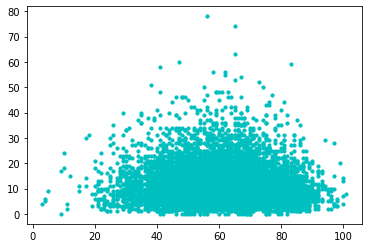

In [ ]:
plt.scatter(data.age , data.delta, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[-0.23003294, -0.7525815 ],
       [ 1.26066883, -0.21308987],
       [ 0.33785345, -0.61770859],
       ...,
       [-1.7207347 ,  2.07974955],
       [ 0.40883925, -0.88745441],
       [-0.15904714,  0.05665594]])

### Elbow

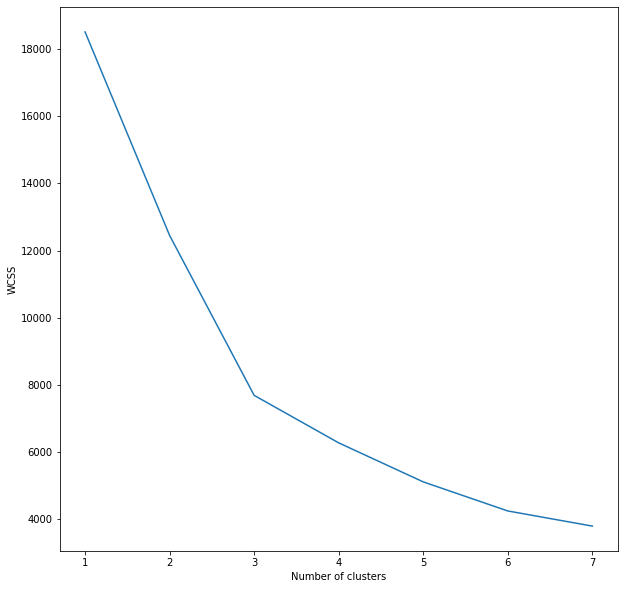

In [ ]:
wcss = []
for i in range(1,8):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x_scaled)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Silhoutte

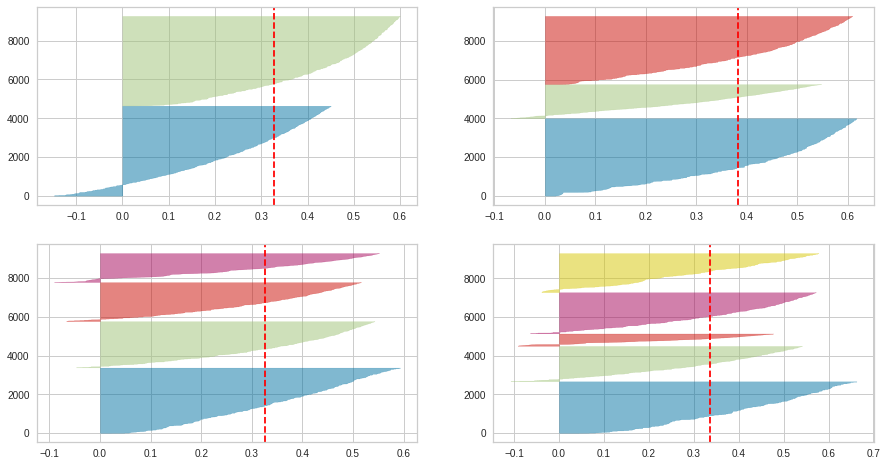

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_scaled)

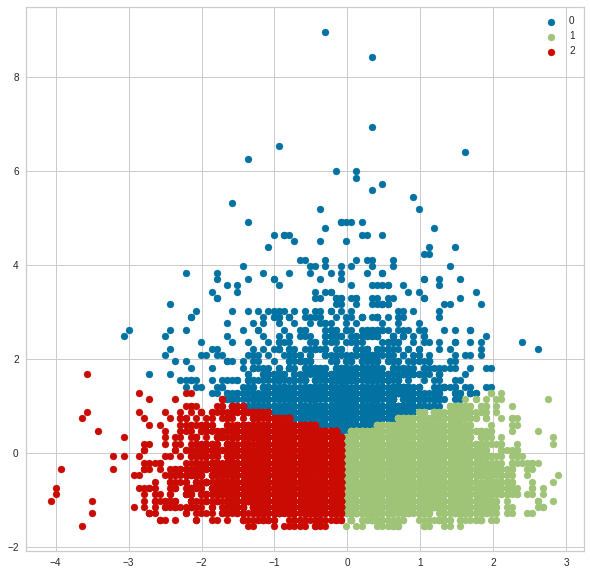

In [ ]:
model = KMeans(n_clusters = 3, init = "k-means++")

label = model.fit_predict(x_scaled)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(x_scaled[label == i , 0] , x_scaled[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_scaled, model.labels_, metric='euclidean')

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.383


## **3. Classification**

Task klasifikasi kami akan melatih suatu model untuk memprediksi apakah seseorang meninggal setelah terdeteksi positif Covid-19. Kami akan mencoba berbagai macam classification models, lalu memilih salah satu yang paling cocok dan melakukan *fine-tuning hyperparameters*.

In [ ]:
df_pos = df[df.covid_res == 1]
df_pos

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,confirmed_died,died_symptoms_delta,died_icu_delta,age_bin
0,1,2,2020-06-02,2020-06-02,NaT,25,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,25 to 34
1,1,2,2020-06-22,2020-06-17,NaT,52,2.0,2.0,2.0,2.0,...,1.0,2.0,1.0,1.0,1.0,2.0,False,NaT,NaT,45 to 54
2,2,2,2020-04-12,2020-04-07,2020-04-13,57,1.0,1.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,True,6 days,1 days,55 to 64
3,1,2,2020-06-17,2020-06-12,NaT,51,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,45 to 54
4,1,2,2020-06-08,2020-06-07,NaT,67,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,65 to 74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32606,2,2,2020-05-19,2020-05-15,2020-05-27,58,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,1.0,True,12 days,8 days,55 to 64
32607,2,2,2020-06-18,2020-06-11,NaT,67,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,65 to 74
32608,2,2,2020-03-29,2020-03-25,NaT,65,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,1.0,False,NaT,NaT,65 to 74
32609,1,2,2020-03-29,2020-03-27,NaT,29,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,False,NaT,NaT,25 to 34


In [ ]:
label = df_pos['confirmed_died'].to_frame() # label pada data (untuk diprediksi)
del df_pos['confirmed_died']
df_pos.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died_symptoms_delta,died_icu_delta,age_bin
0,1,2,2020-06-02,2020-06-02,NaT,25,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaT,NaT,25 to 34
1,1,2,2020-06-22,2020-06-17,NaT,52,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,1.0,1.0,2.0,NaT,NaT,45 to 54
2,2,2,2020-04-12,2020-04-07,2020-04-13,57,1.0,1.0,2.0,2.0,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,6 days,1 days,55 to 64
3,1,2,2020-06-17,2020-06-12,NaT,51,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaT,NaT,45 to 54
4,1,2,2020-06-08,2020-06-07,NaT,67,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,NaT,NaT,65 to 74


### Menghapus kolom-kolom yang memiliki tipe data tidak cocok

In [ ]:
del df_pos['date_died']

In [ ]:
del df_pos['entry_date']

In [ ]:
del df_pos['date_symptoms']

In [ ]:
del df_pos['died_symptoms_delta']

In [ ]:
del df_pos['died_icu_delta']

In [ ]:
del df_pos['age_bin']

In [ ]:
df_pos

,sex,patient_type,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,25,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
1,1,2,52,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
2,2,2,57,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
3,1,2,51,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
4,1,2,67,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32606,2,2,58,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0
32607,2,2,67,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
32608,2,2,65,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
32609,1,2,29,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0


In [ ]:
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan 
X_train, X_test, y_train, y_test = train_test_split(df_pos, label, train_size=0.8, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian": GaussianNB(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    "XGB": XGBClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = {}
        scores["score"] = model.score(X_test, y_test)
        scores["recall"] = recall_score(y_test, y_pred, average=None)
        scores["recall-macro"] = recall_score(y_test, y_pred, average='macro')
        scores["recall-micro"] = recall_score(y_test, y_pred, average='micro')
        scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
        scores["f1-score"] = f1_score(y_test, y_pred, average='weighted')

        model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    if c == 'recall':
        continue
    scores_df[c] = scores_df[c].astype(float)
scores_df

,score,recall,recall-macro,recall-micro,recall-weighted,f1-score
Logistic Regression,0.769889,"[0.9297403447523456, 0.3717391304347826]",0.650740,0.769889,0.769889,0.745769
KNN,0.724895,"[0.8634082478725725, 0.3798913043478261]",0.621650,0.724895,0.724895,0.709830
Random Forest,0.728631,"[0.85555313113681, 0.4125]",0.634027,0.728631,0.728631,0.717129
LinearSVC,0.762105,"[0.8817368535893519, 0.4641304347826087]",0.672934,0.762105,0.762105,0.751280
SVC,0.734236,"[0.9757800567313987, 0.13260869565217392]",0.554194,0.734236,0.734236,0.662864
Decision Tree,0.718979,"[0.8616626663757364, 0.3635869565217391]",0.612625,0.718979,0.718979,0.702748
Gaussian,0.717266,"[0.797730744054113, 0.5168478260869566]",0.657289,0.717266,0.717266,0.718122
Percepton,0.393586,"[0.15644774165393846, 0.9842391304347826]",0.570343,0.393586,0.393586,0.330040
SGD,0.752452,"[0.9618154047567096, 0.23097826086956522]",0.596397,0.752452,0.752452,0.704300
XGB,0.771602,"[0.933667903120227, 0.36793478260869567]",0.650801,0.771602,0.771602,0.746613


In [ ]:
scores_df.reset_index(inplace=True)

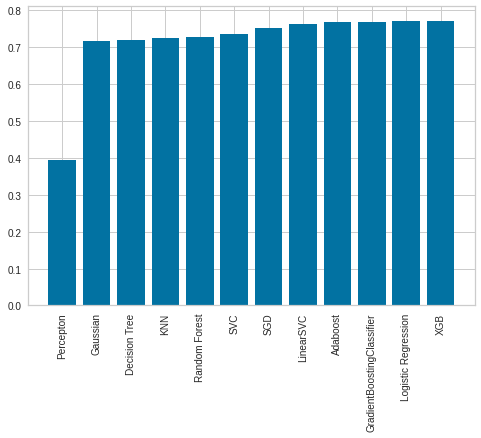

In [ ]:
scores_df = scores_df.sort_values('score')
plt.bar(scores_df['index'], scores_df['score'])
plt.xticks(rotation='vertical')
plt.show()

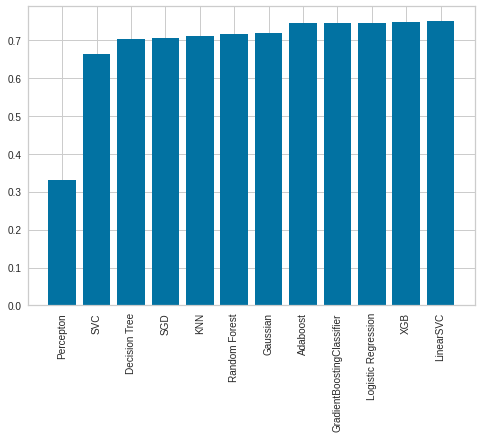

In [ ]:
scores_df = scores_df.sort_values('f1-score')
plt.bar(scores_df['index'], scores_df['f1-score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()
solvers = ['lbfgs', 'sag', 'saga', 'newton-cg']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
weight = {}
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1050 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

Best: 0.366586 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.364789 (0.014463) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.366316 (0.014743) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.365867 (0.014600) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.364789 (0.014463) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.366586 (0.014482) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.366496 (0.01495

In [ ]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
log_reg = LogisticRegression(max_iter=35000, **grid_search.best_params_)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, max_iter=35000, solver='newton-cg')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
predicted = log_reg.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

Akurasi: 0.769889459754009
Presisi: 0.679920477137177
Recall: 0.769889459754009
F1-score: 0.7457689430410237


### Coba untuk oversample

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
def count_categories(y_train):
    cnt = [0, 0]
    for i in y_train.values:
        cnt[i[0]] += 1
    print('0:', cnt[0])
    print('1:', cnt[1])

In [ ]:
count_categories(y_train)

0: 18272
1: 7418


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  after removing the cwd from sys.path.


In [ ]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
count_categories(y_train_smote)

0: 18272
1: 18272


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  after removing the cwd from sys.path.


In [ ]:
log_reg_smote = LogisticRegression(max_iter=35000, **grid_search.best_params_)
log_reg_smote.fit(X_train_smote, y_train_smote)
predicted = log_reg_smote.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.7101043126264985
Presisi: 0.49571984435797667
Recall: 0.7101043126264985
F1-score: 0.7215550440678886


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
count_categories(y_train)

0: 18272
1: 7418


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  after removing the cwd from sys.path.


In [ ]:
oversample = BorderlineSMOTE()
X_train_bsmote, y_train_bsmote = oversample.fit_resample(X_train, y_train)
count_categories(y_train_bsmote)

0: 18272
1: 18272


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  after removing the cwd from sys.path.


In [ ]:
log_reg_bsmote = LogisticRegression(max_iter=35000, **grid_search.best_params_)
log_reg_bsmote.fit(X_train_bsmote, y_train_bsmote)
predicted = log_reg_bsmote.predict(X_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(y_test, predicted))
print("Presisi:", precision_score(y_test, predicted))
print("Recall:", recall_score(y_test, predicted, average='weighted'))
print("F1-score:", f1_score(y_test, predicted, average='weighted'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.67725361980383
Presisi: 0.4611277944611278
Recall: 0.67725361980383
F1-score: 0.6925413687075851


SMOTE mungkin jelek karena banyak data overlap

## **4. Regression**

Task regrsi kami akan melatih suatu model untuk memprediksi durasi seseorang terdeteksi positif sampai hari kematiannya. Kami akan mencoba berbagai macam regression models, lalu memilih dua model yang paling cocok dan membandingkan keduanya dengan tuning hyperparameters.

In [ ]:
df_positive.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,confirmed_died,died_symptoms_delta,died_icu_delta,age_bin
0,1,2,2020-06-02,2020-06-02,NaT,25,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,25 to 34
1,1,2,2020-06-22,2020-06-17,NaT,52,2.0,2.0,2.0,2.0,...,1.0,2.0,1.0,1.0,1.0,2.0,False,NaT,NaT,45 to 54
2,2,2,2020-04-12,2020-04-07,2020-04-13,57,1.0,1.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,True,6 days,1 days,55 to 64
3,1,2,2020-06-17,2020-06-12,NaT,51,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,45 to 54
4,1,2,2020-06-08,2020-06-07,NaT,67,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,False,NaT,NaT,65 to 74


In [ ]:
df_died = df_positive[df_positive['confirmed_died'] == True]
df_died.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,confirmed_died,died_symptoms_delta,died_icu_delta,age_bin
2,2,2,2020-04-12,2020-04-07,2020-04-13,57,1.0,1.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,True,6 days,1 days,55 to 64
12,1,2,2020-04-14,2020-04-08,2020-04-18,78,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,True,10 days,4 days,75 to 84
22,1,2,2020-04-13,2020-04-13,2020-04-20,65,1.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,1.0,1.0,True,7 days,7 days,65 to 74
28,1,2,2020-05-20,2020-05-19,2020-05-20,58,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,True,1 days,0 days,55 to 64
30,2,2,2020-03-25,2020-03-22,2020-03-29,43,2.0,1.0,2.0,2.0,...,2.0,2.0,1.0,2.0,1.0,2.0,True,7 days,4 days,35 to 44


In [ ]:
df_died.drop(columns=['entry_date', 'date_symptoms', 'date_died', 'age_bin', 'confirmed_died', 'covid_res'], inplace=True, axis=1)
df_died.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sex,patient_type,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,died_symptoms_delta,died_icu_delta
2,2,2,57,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,6 days,1 days
12,1,2,78,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,10 days,4 days
22,1,2,65,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,7 days,7 days
28,1,2,58,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1 days,0 days
30,2,2,43,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7 days,4 days


In [ ]:
cat_cols = [
  'intubed',
  'pneumonia',
  'pregnancy',
  'diabetes',
  'copd',
  'asthma',
  'inmsupr',
  'hypertension',
  'other_disease',
  'cardiovascular',
  'obesity',
  'renal_chronic',
  'tobacco',
  'contact_other_covid',
  'icu',
  'sex',
  'patient_type'
]

comorbid_cols = [
  'pneumonia',
  'diabetes',
  'copd',
  'asthma',
  'inmsupr',
  'hypertension',
  'other_disease',
  'cardiovascular',
  'obesity',
  'renal_chronic',
  'tobacco',
]

In [ ]:
for col in cat_cols:
    df_died[col] = df_positive[col].replace({2: 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
comorbid_amount = []
for index, row in df_died.iterrows():
    sum = 0
    for col in comorbid_cols:
        sum += row[col]
    comorbid_amount.append(sum)
    
df_died['comorbid_amount'] = comorbid_amount

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_died.drop(columns=comorbid_cols, axis=1, inplace=True)
df_died.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sex,patient_type,age,intubed,pregnancy,contact_other_covid,icu,died_symptoms_delta,died_icu_delta,comorbid_amount
2,0,0,57,1.0,0.0,0.0,0.0,6 days,1 days,3.0
12,1,0,78,0.0,0.0,1.0,1.0,10 days,4 days,3.0
22,1,0,65,1.0,0.0,0.0,1.0,7 days,7 days,2.0
28,1,0,58,0.0,0.0,1.0,0.0,1 days,0 days,1.0
30,0,0,43,0.0,0.0,0.0,0.0,7 days,4 days,2.0


In [ ]:
died_delta = []
icu_delta = []
for index, row in df_died.iterrows():
    died_int = int(str(row['died_symptoms_delta']).split(" ")[0])
    icu_int = int(str(row['died_icu_delta']).split(" ")[0])
    died_delta.append(died_int)
    icu_delta.append(icu_int)
    
df_died['died_delta'] = died_delta
df_died['icu_delta'] = icu_delta

df_died.drop(columns=['died_symptoms_delta', 'died_icu_delta'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [ ]:
df_died.head()

,sex,patient_type,age,intubed,pregnancy,contact_other_covid,icu,comorbid_amount,died_delta,icu_delta
2,0,0,57,1.0,0.0,0.0,0.0,3.0,6,1
12,1,0,78,0.0,0.0,1.0,1.0,3.0,10,4
22,1,0,65,1.0,0.0,0.0,1.0,2.0,7,7
28,1,0,58,0.0,0.0,1.0,0.0,1.0,1,0
30,0,0,43,0.0,0.0,0.0,0.0,2.0,7,4


In [ ]:
X = df_died.drop(columns=['died_delta'], axis=1)
y = df_died['died_delta']

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[0.        , 0.        , 0.55102041, ..., 0.        , 0.375     ,
        0.01515152],
       [1.        , 0.        , 0.76530612, ..., 1.        , 0.375     ,
        0.06060606],
       [1.        , 0.        , 0.63265306, ..., 1.        , 0.25      ,
        0.10606061],
       ...,
       [0.        , 0.        , 0.33673469, ..., 0.        , 0.125     ,
        0.27272727],
       [0.        , 0.        , 0.64285714, ..., 0.        , 0.25      ,
        0.01515152],
       [0.        , 0.        , 0.56122449, ..., 1.        , 0.125     ,
        0.12121212]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, random_state=42)

In [ ]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Lasso Regression": linear_model.Lasso(),
    "Ridge Regression": linear_model.Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "LinearSVR": LinearSVR(),
    "SVR": SVR(),
    "ElasticNet Regression": linear_model.ElasticNet()
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      scores = {}
      scores["R2 score"] = r2_score(y_test, y_pred)

      model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    scores_df[c] = scores_df[c].astype(float)
scores_df

,R2 score
LinearRegression,0.829693
Decision Tree Regressor,0.654856
Lasso Regression,-0.000019
Ridge Regression,0.829285
Random Forest Regressor,0.786421
LinearSVR,0.822955
SVR,0.796332
ElasticNet Regression,0.012220


In [ ]:
scores_df.reset_index(inplace=True)

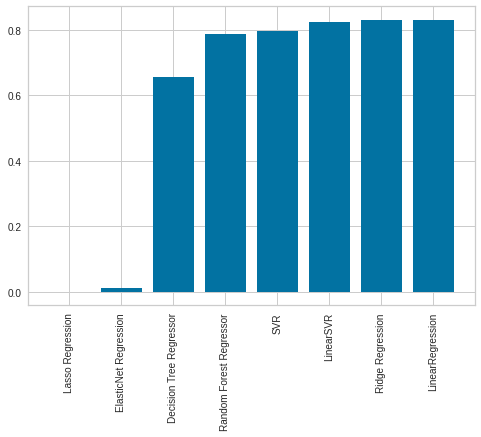

In [ ]:
scores_df = scores_df.sort_values('R2 score')
plt.bar(scores_df['index'], scores_df['R2 score'])
plt.xticks(rotation='vertical')
plt.show()

### Linear Regression VS Ridge Regression

In [ ]:
model = LinearRegression()
fit_intercept = [True, False]
normalize = [True, False]
copy_X = [True, False]
weight = {}
# define grid search
grid = dict(fit_intercept=fit_intercept,normalize=normalize,copy_X=copy_X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_lin = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall', error_score=0)
grid_result_lin = grid_search_lin.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result_lin.best_score_, grid_result_lin.best_params_))
means = grid_result_lin.cv_results_['mean_test_score']
stds = grid_result_lin.cv_results_['std_test_score']
params = grid_result_lin.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Best: 0.000000 using {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.000000 (0.000000) with: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.000000 (0.000000) with: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.000000 (0.000000) with: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
0.000000 (0.000000) with: {'copy_X': True, 'fit_intercept': False, 'normalize': False}
0.000000 (0.000000) with: {'copy_X': False, 'fit_intercept': True, 'normalize': True}
0.000000 (0.000000) with: {'copy_X': False, 'fit_intercept': True, 'normalize': False}
0.000000 (0.000000) with: {'copy_X': False, 'fit_intercept': False, 'normalize': True}
0.000000 (0.000000) with: {'copy_X': False, 'fit_intercept': False, 'normalize': False}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
grid_search_lin.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [ ]:
model = linear_model.Ridge()
alphas = [1,0.1,0.01,0.001,0.0001,0]
fit_intercept = [True, False]
solvers = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
weight = {}
# define grid search
grid = dict(alpha=alphas,fit_intercept=fit_intercept,solver=solvers)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_rid = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall', error_score=0)
grid_result_rid = grid_search_rid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result_rid.best_score_, grid_result_rid.best_params_))
means = grid_result_rid.cv_results_['mean_test_score']
stds = grid_result_rid.cv_results_['std_test_score']
params = grid_result_rid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Best: 0.000000 using {'alpha': 1, 'fit_intercept': True, 'solver': 'svd'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': True, 'solver': 'svd'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': True, 'solver': 'cholesky'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': True, 'solver': 'lsqr'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': True, 'solver': 'sag'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': False, 'solver': 'svd'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': False, 'solver': 'cholesky'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': False, 'solver': 'lsqr'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': False, 'solver': 'sparse_cg'}
0.000000 (0.000000) with: {'alpha': 1, 'fit_intercept': False, 'solver': 'sag'}
0.000000 (0.000000) with: {

In [ ]:
grid_search_rid.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'svd'}

In [ ]:
models = {
    "LinearRegression": LinearRegression(**grid_search_lin.best_params_),
    "Ridge Regression": linear_model.Ridge(**grid_search_rid.best_params_)
}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      scores = {}
      scores["R2 score"] = r2_score(y_test, y_pred)

      model_scores[name] = scores
        
    return model_scores

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()
for c in scores_df.columns:
    scores_df[c] = scores_df[c].astype(float)
scores_df

,R2 score
LinearRegression,0.829693
Ridge Regression,0.829285


In [ ]:
scores_df.reset_index(inplace=True)

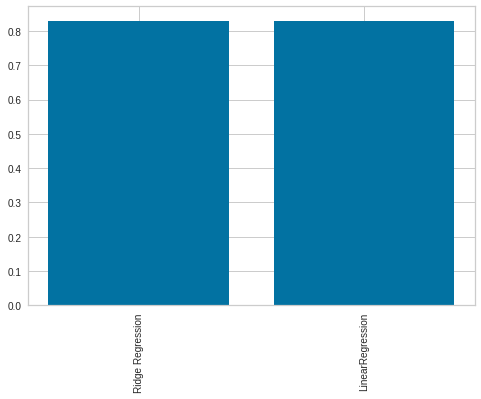

In [ ]:
scores_df = scores_df.sort_values('R2 score')
plt.bar(scores_df['index'], scores_df['R2 score'])
plt.xticks(rotation='vertical')
plt.show()

### Linear Regression

In [ ]:
lr = LinearRegression(**grid_search_lin.best_params_)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([12.01875347,  5.07690143,  6.87340882, ...,  8.0806864 ,
       19.78826671,  8.62494855])

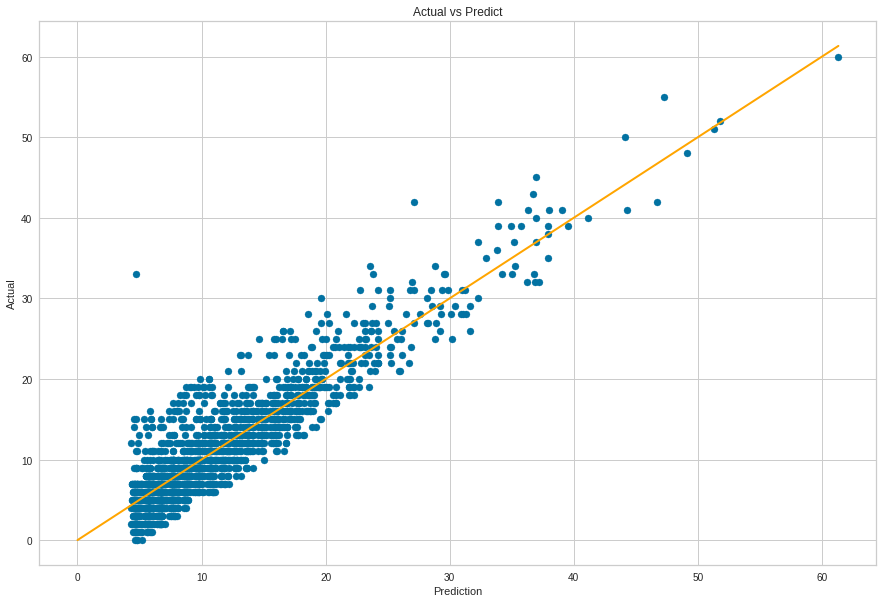

In [ ]:
mn = min(min(y_test),min(y_pred))
mx = max(max(y_test),max(y_pred))
plt.figure(figsize=(15, 10))
plt.scatter(y_pred, y_test)
plt.plot([mn, mx], [mn,mx], c='orange', linewidth=2)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Actual vs Predict')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math 

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred))) 
print("R2 Square:", r2_score(y_test, y_pred))

MSE: 9.586265907377879
MAE: 2.319131505595739
RMSE:  3.0961695540422003
R2 Square: 0.8296929137834398
